# Doğrusal Regresyon Modelleri 


# Basit Doğrusal Regresyon

### Model

In [2]:
# bu çaışmada reklam verilerini kullanarak doğrusal regresyon modelleriyle model, tahmin ve tuned işlemlerini gerçekleştireceğiz
# Advertising.cvs verimizi okutup pandas ve numpy kütüphanelerini çalıştırıyoruz
import numpy as np
import pandas as pd
df=pd.read_csv("csv/Advertising.csv")
df=df.iloc[:,1: len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.info() # info metodu ile verimizin bilgilerine bakmamıza yardımcı olur

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


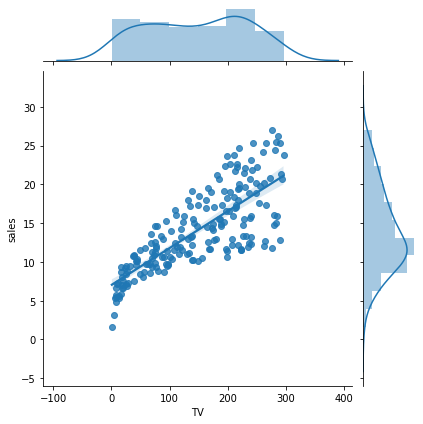

In [4]:
# seaborn kütüphanesini aktive ederek, verimizin grafiğini çıkartıyoruz 
import seaborn as sns
sns.jointplot(x="TV", y="sales", data=df, kind="reg");

In [5]:
from sklearn.linear_model import LinearRegression #sklearn kütüphanesi kullanarak LinearRegression modelimizi import ediyoruz

In [6]:
x=df[["TV"]]
x.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [7]:
y=df[["sales"]]
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [8]:
reg_model=LinearRegression().fit(x,y) # model nesnesi oluşturup fit işleminden geçiriyoruz

In [9]:
dir(reg_model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [10]:
str(reg_model)

'LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)'

In [11]:
reg_model.intercept_ #beta 0 (Sıfır)

array([7.03259355])

In [12]:
reg_model.coef_ #beta 1 (bir)

array([[0.04753664]])

In [13]:
#r kare = bağımlı değişkendeki değişikliğin, bağımsız değişkenlerce, modelimizin açıklanma yüzdesi
reg_model.score(x,y)

0.611875050850071

### Basit Doğrusal Regresyon - tahmin

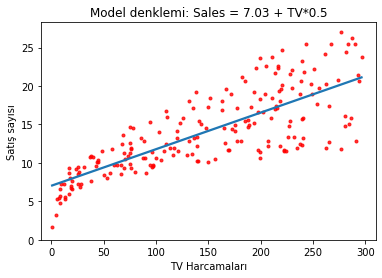

In [16]:
# oluşturduğumuz modelin tahmin işlemleri 

import seaborn as sns
import matplotlib.pyplot as plt
g=sns.regplot(df["TV"], df["sales"], ci=None, scatter_kws={"color" : "r","s" :9} )
g.set_title("Model denklemi: Sales = 7.03 + TV*0.5")
g.set_ylabel("Satış sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10,310)
plt.ylim(bottom=0);

In [15]:
reg_model.intercept_ + reg_model.coef_*165 # 165 sayısı random alalade bir sayıdır.

array([[14.87613922]])

In [17]:
reg_model.predict([[165]]) 

array([[14.87613922]])

# Çoklu doğrusal regresyon 

### Model

In [18]:
# basit regresyondan sonra, çoklu doğrusal regresyon model, tahmin ve tuned  işlemlerini gerçekleştireceğiz

import pandas as pd
çdr=pd.read_csv("csv/Advertising.csv")
çdr=çdr.iloc[:,1: len(df)]
çdr.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [19]:
# x gerçek değer, T tahmin edilen değer

x=çdr.drop("sales", axis=1) # datamızdaki "sales" değişkenini silip, y=değişkenine atayalım
y=çdr["sales"]

In [20]:
x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [22]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lm=LinearRegression()
model=lm.fit(x,y)

In [29]:
model.intercept_ #beta 0 değişmeyen kat sayı

2.9388893694594067

In [27]:
model.coef_ # 0.04*TV + 0.19 * Radio - Newspaper*0.001

array([ 0.04576465,  0.18853002, -0.00103749])

## Çoklu Doğrusal Regresyon - Tahmin

#### Sales=2.94 + TV* 0.04 + Radio* 0.19 - Newspaper*0.001 

30 birim tv, 20 birim radyo, 50 birim gazete . tahmin değerlerini ele alalım

In [31]:
2.94 + 30*0.04 + 20*0.19 - 50*0.001

7.89

In [34]:
yeni_birim=[[30],[20],[50]]

In [37]:
import pandas as pd
yeni_birim=pd.DataFrame(yeni_birim).T
yeni_birim

,0,1,2
0,30,20,50


In [40]:
model.predict(yeni_birim) # model tahmin etme işlemi

array([8.03055442])

In [46]:
from sklearn.metrics import mean_squared_error # Hata karaler toplamı

In [47]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [48]:
model.predict(x)[0:7] # modelimizi tahminden geçiriyoruz

array([20.52397441, 12.33785482, 12.30767078, 17.59782951, 13.18867186,
       12.47834763, 11.72975995])

### MSE: hata kareler ortalaması
### RMSE: Hata kareler uygulamasını karekökü

In [51]:
MSE= mean_squared_error(y, model.predict(x)) # Hata karaler toplamını ele alıyoruz
MSE

2.784126314510936

In [52]:
import numpy as np
RSE=np.sqrt(MSE)
RSE

1.6685701407225697

# model tuning(model doğrulama)

In [54]:
pd.DataFrame(y.head())

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [55]:
x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [56]:
# sınama seti 
from sklearn.model_selection import train_test_split # veri setimizi ayırma işlemine tabi tutuyoruz

In [57]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.20, random_state=99)
# veri setini test ve train olarak ikiye ayırdık. train setinin içerisinde bağımsız ve bağımlı değişkenler olacak, test setinde ise bağımlı ve bağımsız değişkenler olacak

In [59]:
x_train.head() # train değişkenlerinin bağımsız değişkenleri

,TV,radio,newspaper
16,67.8,36.6,114.0
51,100.4,9.6,3.6
97,184.9,21.0,22.0
164,117.2,14.7,5.4
71,109.8,14.3,31.7


In [60]:
y_train.head() # train değişkenin bağımlı değişkenleri (gerçek değerler)

16     12.5
51     10.7
97     15.5
164    11.9
71     12.4
Name: sales, dtype: float64

In [61]:
x_test.head() # test değişkenlerinin bağımsız değişkenleri

,TV,radio,newspaper
135,48.3,47.0,8.5
127,80.2,0.0,9.2
191,75.5,10.8,6.0
66,31.5,24.6,2.2
119,19.4,16.0,22.3


In [62]:
y_test.head()

135    11.6
127     8.8
191     9.9
66      9.5
119     6.6
Name: sales, dtype: float64

In [64]:
lm=LinearRegression()
model=lm.fit(x_train,y_train)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
y_pred=model.predict(x_train) # tahmin edilen bağımsız tahmin değerleri, bu değerleri bulup, y_train bağımlı değişkenlerle karşılaştıracağız
y_pred[:5]

array([12.96387317,  9.2827431 , 15.28736504, 11.00844173, 10.61620631])

In [70]:
# Hata kareler ortalaması karekökü alımı/ eğitim hatası
np.sqrt(mean_squared_error(y_train, model.predict(x_train))) # Bu hata train hatamız

1.7236824822650754

In [71]:
#test hatası
np.sqrt(mean_squared_error(y_test, model.predict(x_test)))

1.4312783138301641

In [72]:
#k-katlı cv - Hatayı daha doğru değerlendirmek adına k-katlı cv kullanılır
from sklearn.model_selection import cross_val_score # fonksiyonumuzu tanımladık

In [73]:
cross_val_score(model, x_train, y_train, cv=10, scoring="neg_mean_squared_error") # Hata karaler ortalamasını tanımlıyoruz

array([-2.1019073 , -2.48953197, -3.09704214, -2.34694216, -3.68175761,
       -1.8691401 , -3.18173007, -4.1927349 , -2.17128376, -8.03821974])

In [75]:
#cv MSE # train setine ilişkin ortalama hata.
np.mean(-cross_val_score(model, x_train, y_train, cv=10, scoring="neg_mean_squared_error"))

3.3170289742341246

In [77]:
#cv RMSE # hata kareler ortalamasının karekök değeri
np.sqrt(np.mean(-cross_val_score(model,x_train, y_train, cv=10, scoring="neg_mean_squared_error" )))

1.8212712522395242

# Ridge regresyon

### Ridge regresyon model kurma işlemleri

amaç hata karaler toplamını minimize eden kat sayıları, bu katsayılara bir ceza uygulayarak bulmaktır.

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt 
from sklearn.linear_model import RidgeCV

In [3]:
df=pd.read_csv("csv/Hitters.csv") # hitters.csv doyasını okuduk
df=df.dropna() # içindeki eksik değerleri silme işlemi

dms=pd.get_dummies(df[["League", "Division", "NewLeague"]]) # kategorik değişkenleri dummies değişkenlerine çevirdik

y = df["Salary"] # bağımlı değişkenimizi belirledik / beyzbol oyuncularına ait bir veri seti

X_ =df.drop(["Salary", "League","Division", "NewLeague"], axis=1).astype("float64")
x=pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train, X_test, y_train, y_test=train_test_split(X_,y,test_size=0.25,
                                                 random_state=42)

# amacımız salary değişkenini kullanarak diğer değişkenleri tahmin etmek

In [4]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [5]:
df.shape # shape metoduyla Boyut bilgisini getirdik

(263, 20)

In [6]:
# modelimizi fit ediyoruz
ridge_model=Ridge(alpha=0.5).fit(X_train, y_train) # alpha parametresi lambdaya eşdeğerdir
ridge_model

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [7]:
ridge_model.coef_ # değişken Kat sayılar

array([-1.95081549,  9.09775384,  5.39590977, -3.28958358, -1.32420962,
        5.4129684 ,  5.20633307, -0.11431912, -0.43388358, -1.31565462,
        1.96630863,  1.00516094, -0.63942483,  0.27545086,  0.26661031,
       -0.22459807])

In [8]:
ridge_model.intercept_ # Sabit kat sayı

-6.755067962561043

In [9]:
lambdalar=10**np.linspace(10,-2,100)*0.5 #linspace=rastgele sayılar üretme işlemi
lambdalar [:5]

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09])

şu an ki, bir yöntemle oluşturduğumuz lambda değerlerine karşı, kat sayıların nasıl değişeceğine karşın gözlemlemeye çalışmak

In [10]:
ridge_model=Ridge()
katsayilar=[]

for i in lambdalar:
    ridge_model.set_params(alpha= i) # set_params(fonksiyon) = parametreleri set etmek, ayarlamak için kullanılır.
    ridge_model.fit(X_train, y_train)
    katsayilar.append(ridge_model.coef_)

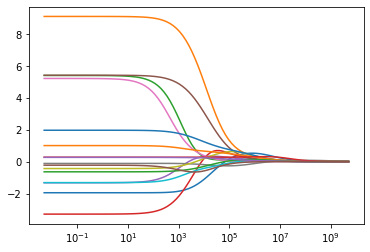

In [11]:
# lambdaları ve katsayılarını görselleştireceğiz
ax=plt.gca()
ax.plot(lambdalar, katsayilar)
ax.set_xscale("log")

# Ridge Model Tahmin 

In [12]:
# tahmin işlemini gerçekleştirmek için ilk önce modelimizi fit etme işleminden geçiriyoruz

ridge_model=Ridge().fit(X_train,y_train)

In [13]:
y_pred=ridge_model.predict(X_train) #tahmin edilen değerler y bağımlı değişken değerlerini tahmin ettik

In [14]:
y_train[:10] # gerçek değerler

183     125.0
229    1940.0
286     940.0
102     375.0
153     100.0
320     960.0
135      90.0
213     100.0
308     750.0
161     657.0
Name: Salary, dtype: float64

In [15]:
#train değer hatası cv edilmemiş yani doğrulanmamış değer
RMSE=np.sqrt(mean_squared_error(y_train,y_pred))
RMSE

295.5404451024025

In [16]:
#cv edilmiş train hata değerleri, doğrulanmış hata
np.sqrt(np.mean(-cross_val_score(ridge_model, X_train, y_train, cv=10, scoring="neg_mean_squared_error")))


NameError: name 'cross_val_score' is not defined

#test hatası : test hatasını hesaplamak için test setinin gerçek değerleri ve test setine ilişkin tahmin edilen değerlere erişmek gerekiyor

In [ ]:
#test hatası
y_pred=ridge_model.predict(X_test)
RMSE=np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

# Ridge Model Tuning

**Neden Model Tuning?** model tuning işlemi modelin performansını en üst düzeyi çıkaröa işlemi


In [ ]:
ridge_model = Ridge(1).fit(X_train, y_train) # model fit etme işlemi
y_pred = ridge_model.predict(X_test) # test setimizin bağımsız değişkenlerini aldık, ve test setinin bağımlı değişkenlerini test ettik
np.sqrt(mean_squared_error(y_test, y_pred))

In [18]:
np.random.randint(0,1000,10)

array([ 30, 482, 335, 290, 151, 415, 678, 722, 825,  42])

In [19]:
lambdalar1 = np.random.randint(0,1000,100)

In [21]:
ridgecv = RidgeCV(alphas = lambdalar1, scoring = "neg_mean_squared_error", cv = 10, normalize = True)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([658, 822, 241, 872, 239, 695,  12, 146, 307, 571, 102, 905, 657,
       535, 791, 778, 398, 523, 606, 446, 494, 910, 938, 378, 851, 402,
       215, 496, 369, 712, 140, 158, 284, 707, 780, 652, 888, 757, 526,
       326, 289, 652, 474, 955, 886, 421, 918, 947, 117, 295,  36, 418,
       159, 492, 998, 457, 146, 424, 177,  12, 135, 301,  51,  28,  96,
       779, 815, 358, 291, 210, 901, 122,  13, 133,  56, 248, 669, 949,
       896, 188, 872, 988, 235, 161, 731, 982,  76, 554, 630, 795, 371,
       146,  20, 547,  12, 498, 798, 834, 381,  25]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [22]:
ridgecv.alpha_

12

In [24]:
# final modeli
ridge_tuned = Ridge(alpha = ridgecv.alpha_).fit(X_train, y_train)

In [26]:
y_pred = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred)) # final test hatamız

360.7481379042011

# Lasso Regresyon

amaç hata karaler toplamını minimize eden katsayıları bu katsayılara bir ceza uygulayarak bulmaktır

## gerekli kütüphaneler

In [27]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV

### veri seti

In [29]:
df = pd.read_csv("csv/Hitters.csv")

df = df.dropna()

dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

y = df["Salary"]

X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [30]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [33]:
df.shape # boyut bilgisi

(263, 20)

In [34]:
lasso_model = Lasso().fit(X_train, y_train) # lasso modelimizi kurup fit ettik
lasso_model

C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8256653.399850385, tolerance: 3898.686956380658
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [35]:
lasso_model.intercept_

-5.587450677336733

In [36]:
lasso_model.coef_ [:5]

array([-1.74875691,  8.59204135,  6.67993798, -3.06715333, -1.9184307 ])

In [37]:
#farklı lambda degerlerine karsilik katsayilar

In [41]:
lasso = Lasso()
coefs = []
alphas =np.random.randint(0,10000,100)
for a in alphas:
    lasso.set_params(alpha = a) # set_params(fonksiyon) = parametreleri set etmek, ayarlamak için kullanılır.
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4365.8699384741485, tolerance: 3898.686956380658
  positive)
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4255341.514857073, tolerance: 3898.686956380658
  positive)


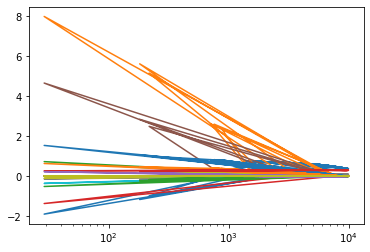

In [43]:
ax = plt.gca()        # modelin grafiği
ax.plot(alphas,coefs)
ax.set_xscale("log")

In [45]:
lasso_model

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [46]:
y_pred=lasso_model.predict(X_test)[0:5]

array([ 609.18826367,  696.96810702, 1009.06157391,  412.22773375,
        409.25851712])

In [48]:
np.sqrt(mean_squared_error(y_test,y_pred)) # test hatamız optimize edilmemiş test hatamız

360.7481379042011

In [51]:
r2_score(y_test,y_pred) #bağımsız değişkenlerin bağımlı değişkendeki değişikliğin yüzde kaçını açıkladığını ifade eder

0.3988279882977048

# Model Tuning

In [52]:
alphas = 10**np.linspace(10,-2,100)*0.5

In [53]:
lasso_cv_model = LassoCV(alphas = alphas, cv = 10, max_iter = 100000).fit(X_train, y_train)

In [54]:
lasso_cv_model.alpha_

201.85086292982749

In [55]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_).fit(X_train, y_train)

In [56]:
y_pred = lasso_tuned.predict(X_test)

In [57]:
np.sqrt(mean_squared_error(y_test, y_pred))

363.6832708037446